# CIFAR-10 Image Classification with Data Augmentation and Learning Rate Scheduling

This Jupyter notebook demonstrates the process of building and training a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset. The dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. Data augmentation and learning rate scheduling techniques are used to improve the model's performance.

## Table of Contents
1. [Imports and Setup](#imports-and-setup)
2. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
3. [Data Augmentation](#data-augmentation)
4. [Model Building and Training](#model-building-and-training)
5. [Results Visualization](#results-visualization)

## Imports and Setup

We start by importing the necessary libraries and modules.

```python
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
import os
import matplotlib.pyplot as plt
```

We also check if a GPU is available for training.

```python
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
```

## Data Loading and Preprocessing

The CIFAR-10 dataset is loaded using TensorFlow's built-in function. The data is then normalized by dividing the pixel values by 255 to scale them between 0 and 1. The labels are one-hot encoded using LabelBinarizer.

```python
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
x_train, x_test = x_train / 255, x_test / 255
```

## Data Augmentation

Data augmentation is used to artificially increase the size of the training set by applying random transformations to the images. This helps to prevent overfitting and improve the model's ability to generalize.

```python
aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
```

## Model Building and Training

We create a CNN model using TensorFlow's Sequential API. The model consists of convolutional layers, batch normalization layers, max pooling layers, and fully connected layers. The output layer uses a softmax activation function for multi-class classification.

```python
net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10, activation="softmax")
])
```

We compile the model using the SGD optimizer and categorical cross-entropy loss function. A learning rate scheduler is used to adjust the learning rate during training.

```python
opt = tf.keras.optimizers.SGD()
bsize = 32
net.compile(optimizer=opt, metrics=["accuracy"], loss=['categorical_crossentropy'])
H_net = net.fit(aug.flow(x_train, y_train, batch_size=bsize), steps_per_epoch=len(x_train) // bsize, epochs=15, validation_data=[x_test, y_test])
```

## Results Visualization

Finally, we visualize the training and validation accuracy and loss using Matplotlib.

```python
plt.style.use('ggplot')
plt.plot(H_net.history['accuracy'], label='train_accuracy')
plt.plot(H_net.history['val_accuracy'], label='val_accuracy')
plt.plot(H_net.history['loss'], label='train_loss')
plt.plot(H_net.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.show()
```

The resulting plot allows us to analyze the model's performance and identify any potential issues, such as overfitting or underfitting.

In [1]:
#tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range= 0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [3]:
import os 
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [4]:
x_train,x_test =x_train/255, x_test/255
def scheduler(epoch, lr):
  if epoch <=2:
     return 0.1
  else:
     return 0.01
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [5]:
x_train,x_test =x_train/255, x_test/255


# creating network
net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape= (32, 32, 3)),
    layers.BatchNormalization(), 
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(), 
    layers.MaxPool2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(), 
    layers.MaxPool2D(),
    layers.Flatten(), 
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers .Dense( 10, activation="softmax")


])



In [8]:
opt=tf.keras.optimizers.SGD()
bsize=32
net.compile(optimizer=opt,metrics=["accuracy"],
# WITH OUT ONE HOT encoding
loss=['categorical_crossentropy'])
H_net=net.fit(aug.flow(x_train,y_train,batch_size=bsize) ,steps_per_epoch=len(x_train)// bsize,
epochs=15,validation_data=[x_test,y_test])


Epoch 1/15
1562/1562 [==============================] - 121s 77ms/step - loss: 1.6703 - accuracy: 0.4103 - val_loss: 1.8923 - val_accuracy: 0.3663
Epoch 2/15
1562/1562 [==============================] - 119s 76ms/step - loss: 1.3704 - accuracy: 0.5136 - val_loss: 1.4904 - val_accuracy: 0.4844
Epoch 3/15
1562/1562 [==============================] - 126s 81ms/step - loss: 1.2460 - accuracy: 0.5605 - val_loss: 1.4605 - val_accuracy: 0.5140
Epoch 4/15
1562/1562 [==============================] - 125s 80ms/step - loss: 1.1660 - accuracy: 0.5890 - val_loss: 2.8664 - val_accuracy: 0.3270
Epoch 5/15
1562/1562 [==============================] - 126s 81ms/step - loss: 1.1122 - accuracy: 0.6111 - val_loss: 1.1880 - val_accuracy: 0.5969
Epoch 6/15
1562/1562 [==============================] - 121s 78ms/step - loss: 1.0622 - accuracy: 0.6282 - val_loss: 1.9626 - val_accuracy: 0.4912
Epoch 7/15
1562/1562 [==============================] - 126s 80ms/step - loss: 1.0244 - accuracy: 0.6406 - val_loss: 1

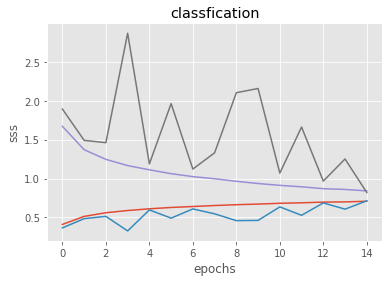

In [9]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.plot(H_net.history['accuracy'],label='train_accuracy')
plt.plot(H_net.history['val_accuracy'],label='val_accuracy')
plt.plot(H_net.history['loss'],label='train_loss')
plt.plot(H_net.history['val_loss'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.show()

In [10]:
net.save('imgen_net.h5')